In [1]:
from pathlib import Path

import torch
from PIL import Image
from torchlake.common.models import VggFeatureExtractor
from torchlake.common.utils.convert import img_tensor_to_np
from torchlake.common.utils.image import save_img_array
from torchlake.common.utils.plot import plot_grids
from torchlake.style_transfer.models import DoodleAuxiliaryNetwork
from torchlake.style_transfer.models.neural_doodle.loss import MrfLoss
from torchlake.style_transfer.utils.train import run_neural_doodle
from torchvision import transforms

# setting


In [2]:
artifacts_path = Path("../../artifacts/neural-doodle")

In [3]:
device = torch.device("cuda:0")

In [4]:
STYLE_LAYER_NAMES = ["3_1", "4_1"]

# data


In [5]:
transform = transforms.Compose([transforms.ToTensor()])

In [6]:
style = transform(Image.open(artifacts_path.joinpath('style.jpg'))).unsqueeze(0).to(device)
style_mask = transform(Image.open(artifacts_path.joinpath('semantic_map.png'))).unsqueeze(0).to(device)
input_mask = transform(Image.open(artifacts_path.joinpath('input_map.png'))).unsqueeze(0).to(device)

# model


In [27]:
mask_weight = 5e2

In [28]:
feature_extractor = VggFeatureExtractor("vgg19", "relu", device)

In [29]:
model = AuxiliaryNetwork(
    feature_extractor,
    STYLE_LAYER_NAMES,
    mask_weight=mask_weight,
)

# train


In [30]:
CONTENT_WEIGHT = 1
STYLE_WEIGHT = 1
SMOOTHNESS = 1

In [31]:
criterion = MrfLoss(CONTENT_WEIGHT, STYLE_WEIGHT, SMOOTHNESS)

In [32]:
output = run_neural_doodle(model, criterion, style, style_mask, input_mask, max_scale=1)

scales: [[69, 46], [138, 92], [276, 184], [552, 368]]
phases 1 begins
0      Total Loss: 16102746.000000 Style Loss : 16102746.000000
50     Total Loss: 4112922.500000 Style Loss : 4112922.500000
100    Total Loss: 3362472.000000 Style Loss : 3362472.000000
150    Total Loss: 3118113.500000 Style Loss : 3118113.500000
200    Total Loss: 2808178.250000 Style Loss : 2808178.250000
250    Total Loss: 2745788.000000 Style Loss : 2745788.000000
300    Total Loss: 2686612.250000 Style Loss : 2686612.250000
phases 2 begins
0      Total Loss: 77275376.000000 Style Loss : 77275376.000000
50     Total Loss: 9194442.000000 Style Loss : 9194442.000000
100    Total Loss: 7638215.000000 Style Loss : 7638215.000000
150    Total Loss: 7043375.000000 Style Loss : 7043375.000000
200    Total Loss: 6832255.500000 Style Loss : 6832255.500000
250    Total Loss: 6720954.000000 Style Loss : 6720954.000000
300    Total Loss: 6645441.500000 Style Loss : 6645441.500000
phases 3 begins
0      Total Loss: 1722692

# visualize


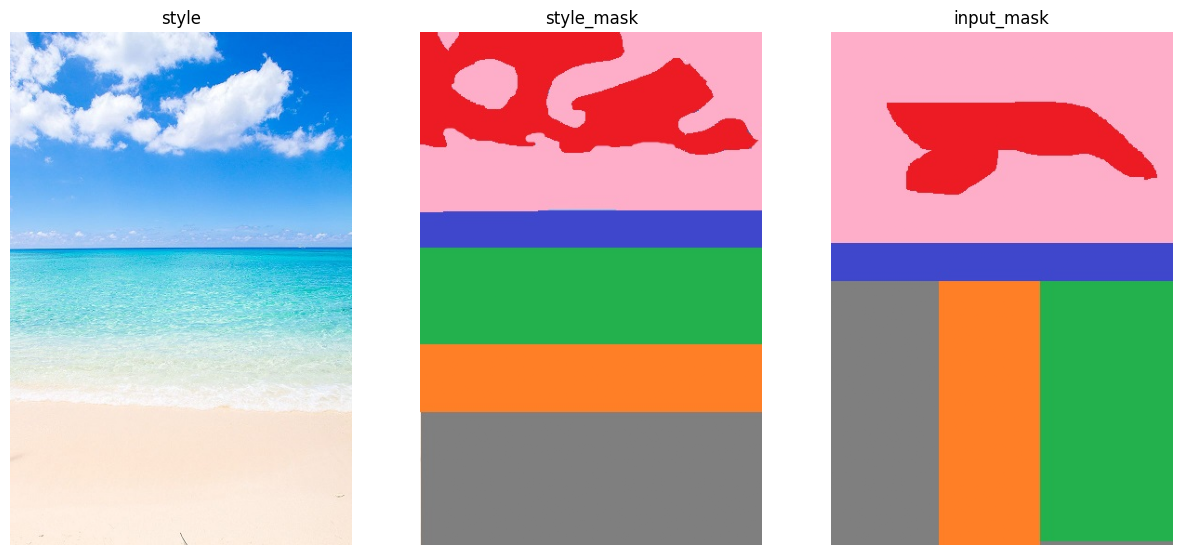

In [33]:
plot_grids(
    [img_tensor_to_np(style), img_tensor_to_np(style_mask), img_tensor_to_np(input_mask)],
    ["style", "style_mask", "input_mask"],
    1,
    3,
    figsize=(15, 15),
)

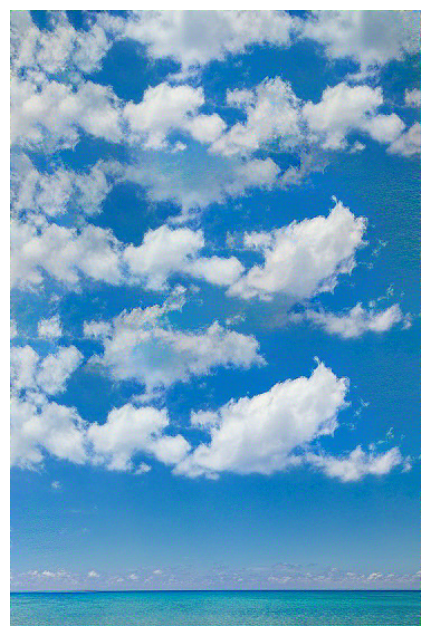

In [34]:
plot_grids([img_tensor_to_np(output)])

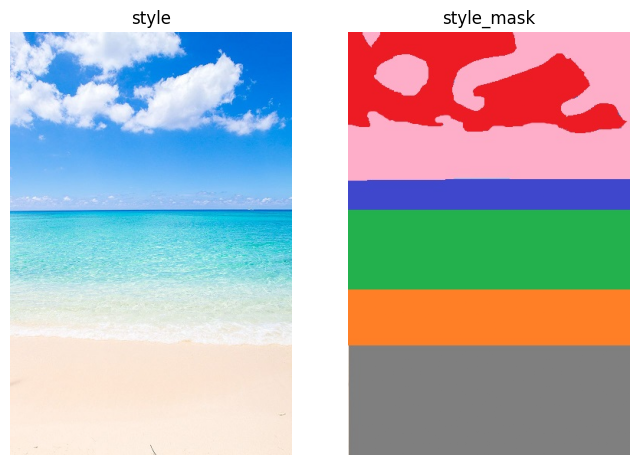

In [35]:
plot_grids(
    [img_tensor_to_np(style), img_tensor_to_np(style_mask)],
    ["style", "style_mask"],
    1,
    2,
    figsize=(8, 8),
)

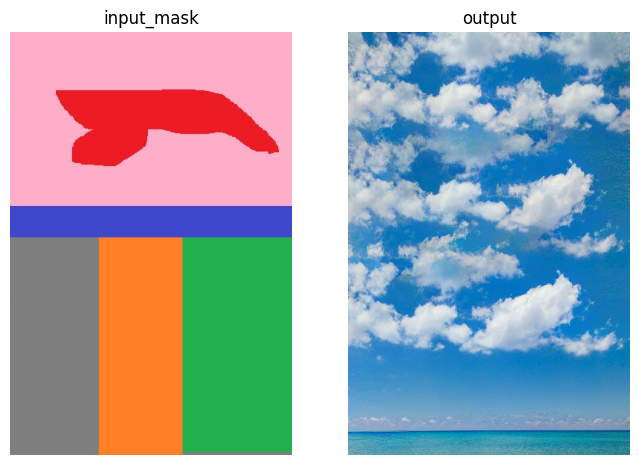

In [36]:
plot_grids(
    [img_tensor_to_np(input_mask), img_tensor_to_np(output)],
    ["input_mask", "output"],
    1,
    2,
    figsize=(8, 8),
)

In [37]:
output_path = artifacts_path.joinpath("output.png")

In [38]:
save_img_array(img_tensor_to_np(output), output_path)